In [ ]:
'''
Team Details:

SAYANTAN BISWAS - AI19BTECH11015
KRISHN VISHWAS KHER - ES19BTECH11015
MUKKAVALLI BHARAT CHANDRA - ES19BTECH11016 

'''

In [ ]:
import numpy as np
import pandas as pd
import random

In [ ]:
#Taking User input for beta decaying factor
beta_decay = float(input("Enter Beta Decay Value (<1): "))
num_iterations = int(input("Enter number of Iterations: "))

Enter Beta Decay Value (<1): 0.85
Enter number of Iterations: 100


In [ ]:
#Reading the Graph

dataset = pd.read_csv("graph.txt", header = None, sep = "\s+")

x = np.array(dataset[0])
y = np.array(dataset[1])


In [ ]:
#Constructing Adjacent Matrix
num_vertices = max(dataset[0].max(), dataset[1].max()) + 1

#Since it is based on 0 index
adj_mat = np.full((num_vertices, num_vertices), 0)
indegree = np.full(num_vertices, 0)
outdegree = np.full(num_vertices, 0)
edge_list = {}


for i in range(len(x)):
    edge_list[(x[i], y[i])] = 1
    adj_mat[x[i]][y[i]] = 1
    outdegree[x[i]] += 1 
    indegree[y[i]] += 1

In [ ]:
def transition_mat(num_vertices, x, y, indegree, outdegree, edge_list):
    T = np.full((num_vertices, num_vertices), 0.00)
    for i in range(num_vertices):
        for j in range(num_vertices):
            if (j, i) in edge_list:
                T[i][j] = 1/outlinks[j]
    return T


def inverse_transition_mat(num_vertices, x, y, indegree, outdegree, edge_list):
    U = np.full((num_vertices, num_vertices), 0.00)
    for i in range(num_vertices):
        for j in range(num_vertices):
            if (i, j) in edge_list:
                U[i][j] = 1/inlinks[j]
    return U

T = transition_mat(num_vertices, x, y, indegree, outdegree, edge_list)
U = inverse_transition_mat(num_vertices, x, y, indegree, outdegree, edge_list)

In [ ]:
#Randomly generating the list of good nodes since it is not part of the input
import random as rand

good_points = []
for i in range(num_vertices):
    temp = rand.randint(0, num_vertices - 1)
    if temp not in good_points:
        good_points.append(temp)

good_points.sort()
good_points = np.array(good_points)

In [ ]:
def select_seed(U, num_vertices, beta_decay, num_iterations):
    s = np.full((num_vertices), 1.000)
    one_mat = np.full((num_vertices), 1.000)
    for i in range(num_iterations):
        s = beta_decay * np.matmul(U, s) + (1 - beta_decay) * (1/num_iterations) * one_mat

    return s 

def rank(x, s):
    store_tup = [[s[i], x[i]] for i in range(len(x))]
    store_tup.sort(reverse = True)

    x_prime = [i[1] for i in store_tup]

    return x_prime


def trust_rank(T, U, num_vertices, L, beta_decay, num_iterations, good_points):
    s = select_seed(U, num_vertices, beta_decay, num_iterations)
    sigma = rank([i for i in range(num_vertices)], s)

    d = np.full((num_vertices), 0.000)

    for i in range(L):
        for sigma[i] in good_points:
            d[sigma[i]] = 1.00

    d = (1/num_vertices) * d

    t_star = d
    for i in range(num_iterations):
        t_star = beta_decay * np.matmul(T, t_star) + (1 - beta_decay) * d

    return t_star 

L = good_points.shape[0]
t_star = trust_rank(T, U, num_vertices, L, beta_decay, num_iterations, good_points)

print(t_star)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.02343645e-05
 5.18447466e-05 3.07486295e-04]


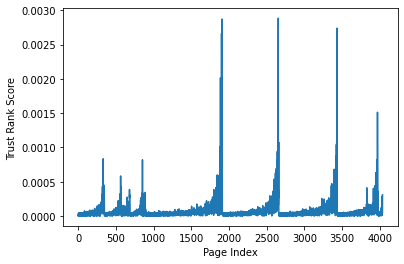

In [ ]:
import matplotlib.pyplot as plt

plt.plot(t_star)
plt.xlabel("Page Index")
plt.ylabel("Trust Rank Score")
plt.show()